In [98]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

import tensorflow_datasets as tfds

[Beans Dataset]('https://www.tensorflow.org/datasets/catalog/beans')

In [99]:
(ds_train, ds_validate, ds_test), info = tfds.load(
    'beans', 
    split=['train','validation','test'], 
    # shuffle_files=True,
    as_supervised=True,
    with_info=True
)


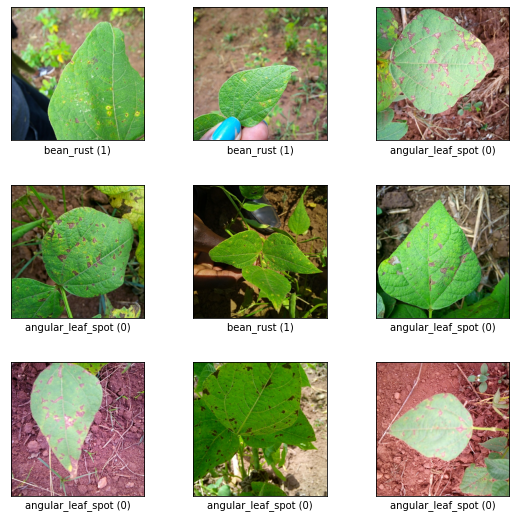

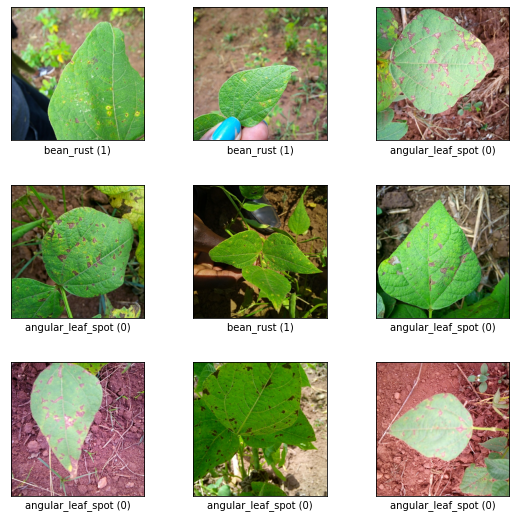

In [100]:
tfds.show_examples(ds_train, info)

In [101]:
print(info.features.shape)
print(info.features.dtype)
print(info.features['image'].shape)
print(info.features['image'].dtype)

{'image': (500, 500, 3), 'label': ()}
{'image': tf.uint8, 'label': tf.int64}
(500, 500, 3)
<dtype: 'uint8'>


In [102]:
print(list(info.splits.keys()))


['train', 'validation', 'test']


In [103]:
print(info.splits['train'].num_examples)
print(info.splits['validation'].num_examples)
print(info.splits['test'].num_examples)


1034
133
128


## Need to flatten the image from 500,500,3 to 500x500x3

In [107]:

def normalize_image(image, label):
    return tf.cast(image, tf.float32) / 255., label


In [109]:
ds_train = ds_train.map(
    normalize_image
)
ds_train.element_spec

(TensorSpec(shape=(500, 500, 3), dtype=tf.float32, name=None),
 TensorSpec(shape=(), dtype=tf.int64, name=None))

In [ ]:
from tensorflow.keras import models, layers

In [ ]:
# model = tf.keras.Sequential([
#     tf.keras.layers.Dense(128, input_shape=(500,500,3,)),
#     tf.keras.layers.Dense(128, activation='relu'),
#     tf.keras.layers.Dense(3, activation='softmax')
# ])

# model.compile(
#     optimizer='rmsprop',
#     loss = 'categorical_crossentropy',
#     metrics=['accuracy']

# )

In [ ]:
network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(500,500,3,)))
network.add(layers.Dense(3, activation = 'softmax'))



In [ ]:
network.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
network.fit(ds_train, epochs=5)

Epoch 1/5


ValueError: in user code:

    File "c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\hugho\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_6" is incompatible with the layer: expected shape=(None, 500, 500, 3), found shape=(500, 500, 3)
